## Support Vector Machine 
- optimal decision and magins
- soft margins
- Kernels

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D
from utils import*
# use seaborn plotting defaults
import seaborn as sns
sns.set_theme()

### Generating samples

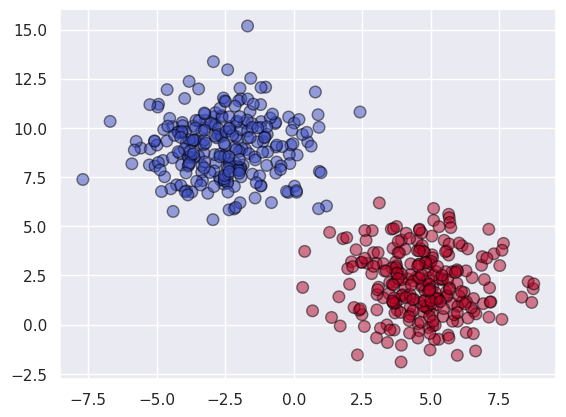

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=1.6, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, s=70, edgecolors='black', cmap=plt.cm.coolwarm, alpha=0.5)
plt.show()

#### Decision Boundary

- When the data are **linearly separable**, one can draw many different linear decision boundary that all of them correctly classify training data.
- But the important question is which one is optimal?

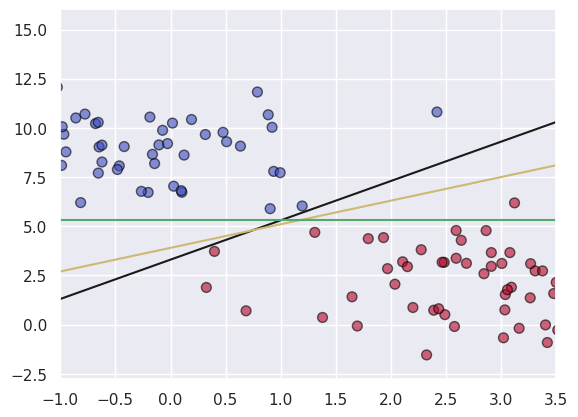

In [4]:
# plot data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)

# draw three different separators
x_values = np.linspace(-1, 3.5)
for w, b, c in [(2, 3.3, 'k'), (1.2, 3.9, 'y'), (0.0, 5.3, 'g')]:
    plt.plot(x_values, w * x_values + b, c)

plt.xlim(-1, 3.5)
plt.show()

### Support Vector Machines: Maximizing the *Margin*

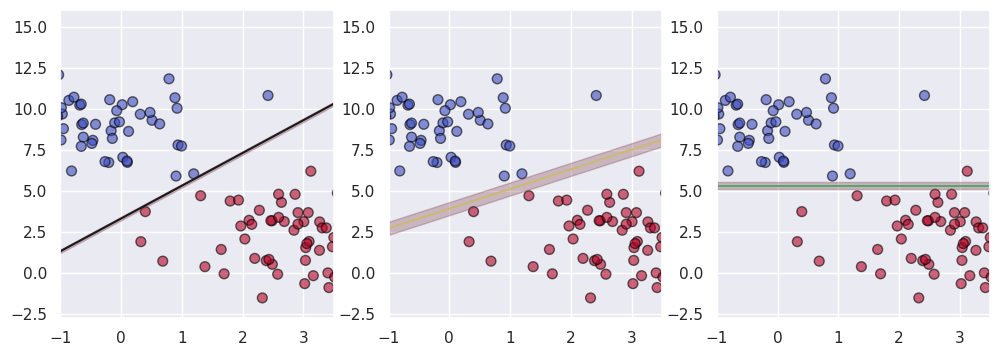

In [5]:
plt.figure(figsize=(12, 4))

# draw separators and margins
x_values = np.linspace(-1, 3.5)
for i, (w, b, c, m) in enumerate([(2, 3.3, 'k', 0.11), (1.2, 3.9, 'y', 0.40), (0.0, 5.30, 'g', 0.2)]):
    plt.subplot(1, 3, i + 1)
    
    # draw data
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
    y_values = w * x_values + b
    
    # draw separator and margin
    plt.plot(x_values, y_values, c)
    plt.fill_between(x_values, y_values - m, y_values + m, edgecolor='none', color='#7D3C4A', alpha=0.3)
    plt.xlim(-1, 3.5)

plt.show()

#### Fitting a Support Vector Machine

Here, we'll use scikit-learn to train a SVM classifier.

In [6]:
from sklearn.svm import SVC

# create Support Vector Classifier using a linear kernel
clf = SVC(kernel='linear')

# train the classifier
clf.fit(X, y)

SVC(kernel='linear')

#### Plot decision boundary for SVM

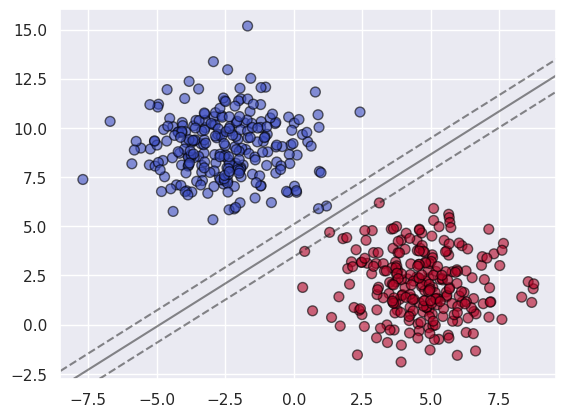

In [7]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plot_svc_decision_function(clf)
plt.show()

### Support Vectors

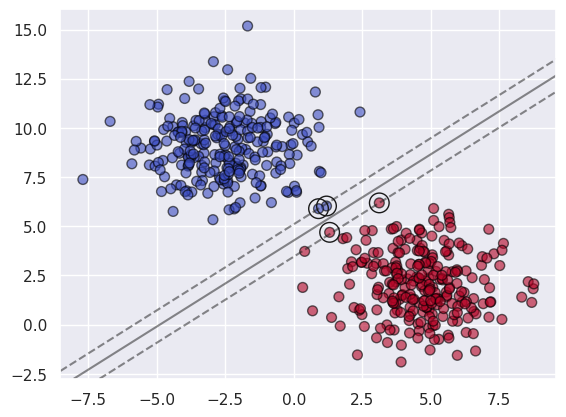

In [8]:
plt.figure()
# plot data and margin
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plot_svc_decision_function(clf)

# plot support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none');

Let's explore how the distribution of points affects the support vectors and the decision boundary.

In [9]:
fig= plt.figure()

def plot_svc_decision_function_2(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
        
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    
    # plot the margins
    ax.contour(X, Y, P, colors='k', 
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])


def plot_svm(N=10):
    
    # create data and classify
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear', gamma='scale', C=1)
    clf.fit(X, y)
    
    # show classification result
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function_2(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none') # Marking the support vectors in the plot
    plt.show()
    
N = widgets.IntSlider(value=10, min=10, max=200, step=10, description='N:')
widgets.interact(plot_svm, N=N);

<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=10, description='N:', max=200, min=10, step=10), Output()), _dom_classes…

**Notice that only the support vectors matter**
- that is, if you moved any of the other points without letting them cross the decision boundaries, they would have no effect on the classification results!

## Soft Margin

In [10]:
fig = plt.figure()

def plot_svc_decision_function_2(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
        
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    
    # plot the margins
    ax.contour(X, Y, P, colors='k', 
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])


def plot_svm(N=10, C=1e-1):
    
    # create data and classify
    X, y = make_blobs(n_samples=300, centers=2, random_state=0, cluster_std=0.50)

    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear',gamma='scale', C=C)
    clf.fit(X, y)
    
    # display classification results
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function_2(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none')
    plt.show()
    
N = widgets.IntSlider(value=10, min=10, max=200, step=10, description='N:')
sml = widgets.FloatSlider(value=1e-1, min=1e-1, max=2.0, step=1e-1, description='C:') #determins the level of error
widgets.interact(plot_svm, N=N, C=sml);

<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=10, description='N:', max=200, min=10, step=10), FloatSlider(value=0.1, …

## Non-linear Classiffication: Kernels

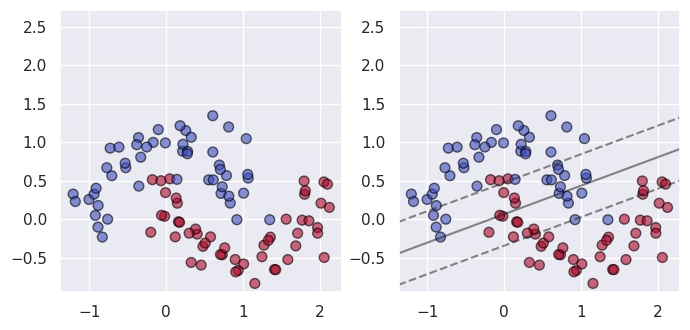

In [11]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.2, random_state=0)
# vreate and train classifier
clf = SVC(kernel='linear').fit(X, y)

# show classification results
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plt.axis('square')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plot_svc_decision_function_2(clf)
plt.axis('square');

#### kernel: radial basis function

$$r(x, 0) = e^{-(x_0^2 + x_1^2)}$$

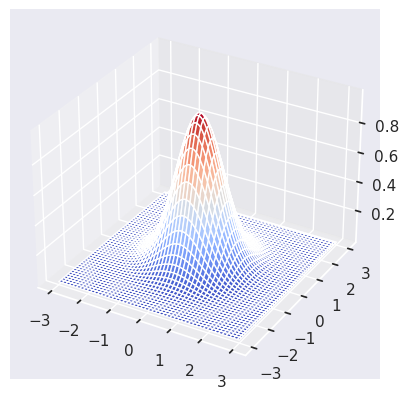

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
R = np.exp(-(X1 ** 2 + X2 ** 2))
ax.plot_surface(X1, X2, R, cmap=plt.cm.coolwarm)
plt.show()

$$r(x, 0) = e^{-(x_0^2 + x_1^2)/2*\sigma^2}$$

In [13]:


def sigma_impact(sigma2 = 1e-1):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x1 = np.linspace(-3, 3, 100)
    x2 = np.linspace(-3, 3, 100)
    X1, X2 = np.meshgrid(x1, x2)

    
    R1 = np.exp(-(X1 ** 2 + X2 ** 2) / (2 * sigma2))
    surf = ax.plot_surface(X1, X2, R1, cmap=plt.cm.coolwarm)
    plt.title('$\sigma^2$ = {:.1f}'.format(sigma2))
    plt.show()

sigma2 = widgets.FloatSlider(value=1e-1, min=1e-1, max=3.0, step=2e-1, description='C:') #determins the level of error
widgets.interact(sigma_impact, sigma2=sigma2);

interactive(children=(FloatSlider(value=0.1, description='C:', max=3.0, min=0.1, step=0.2), Output()), _dom_cl…

In [14]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

If we plot this along with our data, we can see the effect of it:

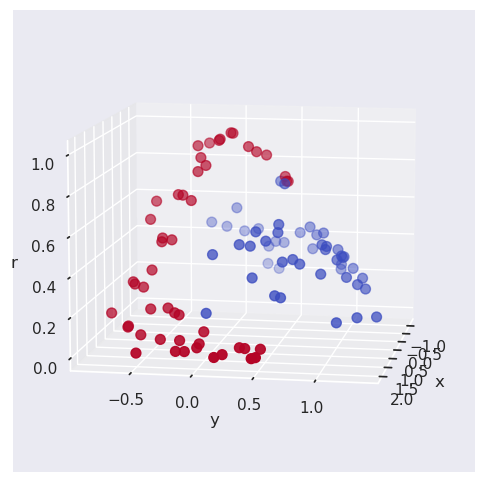

In [15]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='coolwarm')
ax.view_init(elev=10, azim=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')
plt.show()

In [16]:
def svm_kernel(KERNEL = 'rbf', GAMMA = 'scale'):
    clf = SVC(kernel=KERNEL, gamma=GAMMA)
    clf.fit(X, y)

    plt.figure(figsize=(5,5))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
    plot_svc_decision_function_2(clf)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none');
    plt.axis('square')
    plt.show()

widgets.interact(svm_kernel, KERNEL=['rbf', 'poly', 'sigmoid', 'linear'], GAMMA=['scale', 'auto', 2e-1, 5e-1, 8e-1, 1, 2, 3, 4]) # https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py


interactive(children=(Dropdown(description='KERNEL', options=('rbf', 'poly', 'sigmoid', 'linear'), value='rbf'…

<function __main__.svm_kernel(KERNEL='rbf', GAMMA='scale')>

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# 1: split data to train and validation
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# 2: specify range of hyper-parameters
#C_range = np.logspace(-3, 5, 9)         # 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5
gamma_range = np.logspace(-3, 2, 6)     # 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5
kernel_range = ['rbf', 'poly', 'sigmoid']
param_grid = dict(kernel=kernel_range, gamma=gamma_range)
# 3: create classifier
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
# 4: Train
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'gamma': 10.0, 'kernel': 'rbf'} with a score of 0.97


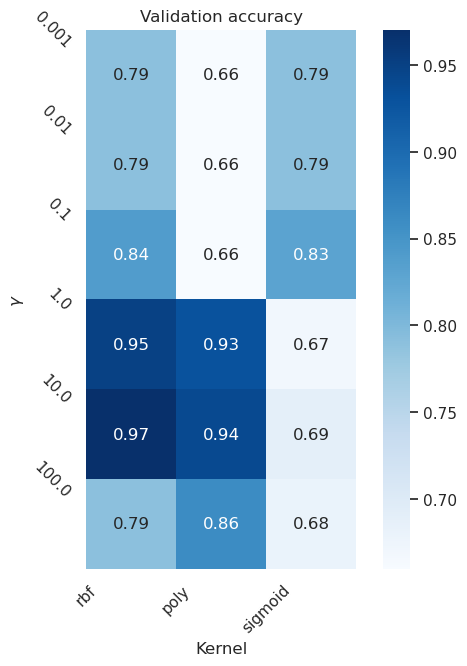

In [18]:
scores = grid.cv_results_['mean_test_score'].reshape(len(gamma_range), len(kernel_range))

plt.figure(figsize=(7, 7))

# Draw heatmap of the validation accuracy as a function of gamma and C
sns.heatmap(scores, annot=True, cmap='Blues', square=True)

plt.xlabel('Kernel')
plt.ylabel('$\gamma$')
plt.xticks(np.arange(len(kernel_range)), kernel_range, rotation=45)
plt.yticks(np.arange(len(gamma_range)), gamma_range, rotation=-45)
plt.title('Validation accuracy')
plt.show()

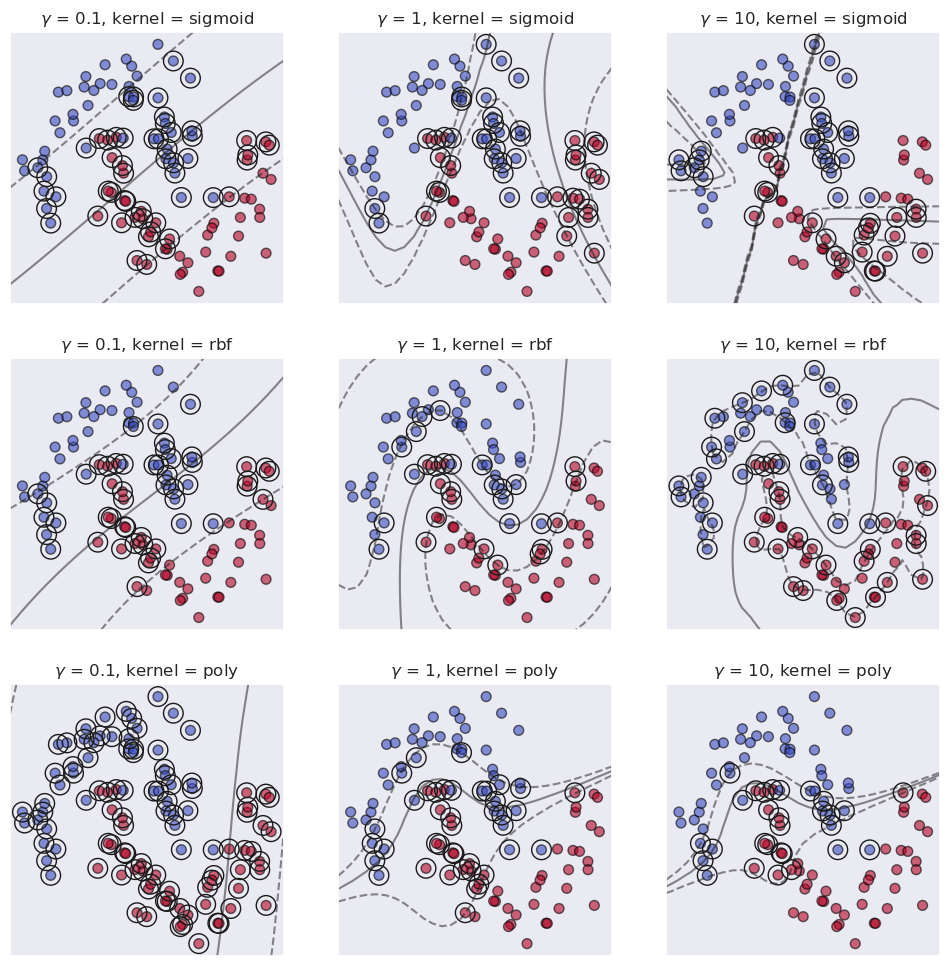

In [33]:
def svm_kernel_gamma_plot(KERNEL='rbf', GAMMA=0.1, index=1.0):
    clf = SVC(kernel=KERNEL, gamma=GAMMA)
    clf.fit(X, y)

    plt.subplot(3, 3, index)
    plt.title("$\gamma$ = {}, kernel = {}".format(gamma, kernel))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
    plot_svc_decision_function_2(clf)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none');
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')
    

plt.figure(figsize=(12, 12))
kernel_range = ['sigmoid', 'rbf', 'poly']
gamma_range = [0.1, 1, 10]
index = 1
for kernel in kernel_range:
    for gamma in gamma_range: 
        svm_kernel_gamma_plot(kernel, gamma, index)
        index += 1
plt.show()

### another example: Spiral 

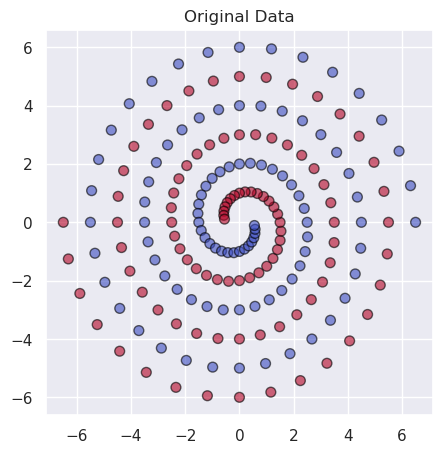

In [35]:
from ipywidgets import interact, FloatLogSlider, Checkbox
# our libraries
from utils import *

X, y = make_spirals()

# Plot spirals
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap=plt.cm.coolwarm, alpha=0.6)
plt.title("Original Data")
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,6))

X1, X2 = np.meshgrid(np.linspace(-7, 7, 200), np.linspace(-7, 7, 200))

def update_plot(C, gamma, show_svs, show_levels):
    
    # create and train SVM classifier
    clf = SVC(C=C, gamma=gamma)
    clf.fit(X, y)
    sv = clf.support_vectors_
    
    # compute contours
    Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])
    Z = Z.reshape(X1.shape)

    # visualize parameter's effect on decision function
    plt.contourf(X1, X2, Z, cmap=plt.cm.coolwarm)
    
    # plot decision boundaries
    if show_levels:
        plt.contour(X1, X2, Z, linewidths=1, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    
    # plot data
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', cmap=plt.cm.coolwarm, alpha=1.0)
    
    # plot support vectors
    if show_svs:
        sv = clf.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], s=150, facecolors='none', edgecolors='k')
    
    title = "$\gamma = 10^{:1.0g}, C = 10^{:1.0g}, SV = {:d}$"
    plt.title(title.format(np.log10(gamma), np.log10(C), len(sv)), size='large')
    #plt.set_xticks(())
    #plt.set_yticks(())
    plt.show()


C = FloatLogSlider(value=10, base=10, min=-3, max=5, step=1, description='C:')
gamma = FloatLogSlider(value=1, base=10, min=-3, max=5, step=1, description='gamma:')
show_svs = Checkbox(value=False, description='Show Support Vectors')
show_levels = Checkbox(value=True, description='Show Levels')

interact(update_plot, C=C, gamma=gamma, show_svs=show_svs, show_levels=show_levels)

<Figure size 1200x600 with 0 Axes>

interactive(children=(FloatLogSlider(value=10.0, description='C:', max=5.0, min=-3.0, step=1.0), FloatLogSlide…

<function __main__.update_plot(C, gamma, show_svs, show_levels)>

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# 1: split data to train and validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2: specify range of hyper-parameters
C_range = np.logspace(-3, 5, 9)         # 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5
gamma_range = np.logspace(-3, 5, 9)     # 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5
param_grid = dict(gamma=gamma_range, C=C_range)

# 3: create classifier
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)

# 4: Train
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10.0, 'gamma': 1.0} with a score of 0.83


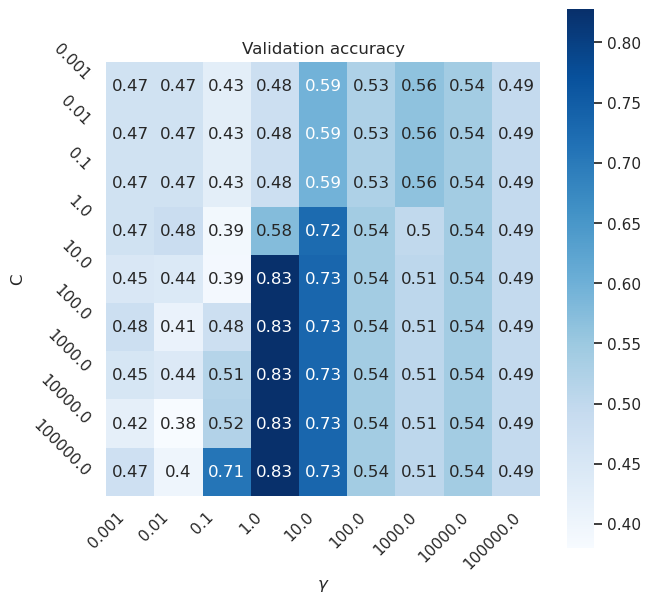

In [ ]:
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range), len(gamma_range))

plt.figure(figsize=(7, 7))

# Draw heatmap of the validation accuracy as a function of gamma and C
sns.heatmap(scores, annot=True, cmap='Blues', square=True)

plt.xlabel('$\gamma$')
plt.ylabel('C')
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range, rotation=-45)
plt.title('Validation accuracy')
plt.show()